In [1]:
from pathlib import Path
import xarray as xr
import numpy as np
import pandas as pd
from tabularbench.core.enums import BenchmarkOrigin
from tabularbench.results.ranking_table import make_ranking_table_, process_benchmark_results, process_sweep_results
from tabularbench.results.results_sweep import ResultsSweep
from tabularbench.config.config_benchmark_sweep import ConfigBenchmarkSweep

cfg_general = ConfigBenchmarkSweep.load(Path("outputs_done/whytrees_tabpfn_orig_finetune/tabpfn-default-categorical_classification/config_benchmark_sweep.yaml"))

models = [
    ("TabPFN (original) Zeroshot", Path("outputs_done/whytrees_tabpfn_orig_zeroshot/tabpfn-default-categorical_classification")),
    ("TabPFN (original) Finetune", Path("outputs_done/whytrees_tabpfn_orig_finetune/tabpfn-default-categorical_classification")),
    ("TabPFN (retrained) Zeroshot", Path("outputs_done/whytrees_tabpfn_foun_zeroshot/foundation-default-categorical_classification")),
    ("TabPFN (retrained) Finetune", Path("outputs_done/whytrees_tabpfn_foun_finetune/foundation-default-categorical_classification")),
    ("TabForest Zeroshot", Path("outputs_done/whytrees_tabsgfd_zeroshot/foundation-default-categorical_classification")),
    ("TabForest Finetune", Path("outputs_done/whytrees_tabsgfd_finetune/foundation-default-categorical_classification")),
    ("TabForestPFN Zeroshot", Path("outputs_done/foundation_mix_600k_zeroshot/foundation-default-categorical_classification")),
    ("TabForestPFN Finetune", Path("outputs_done/foundation_mix_600k_finetune/test_categorical_classification")),
]

models_numerical = [
    ("TabPFN (original) Zeroshot", Path("outputs_done/whytrees_tabpfn_orig_zeroshot/tabpfn-default-numerical_classification")),
    ("TabPFN (original) Finetune", Path("outputs_done/whytrees_tabpfn_orig_finetune/tabpfn-default-numerical_classification")),
    ("TabPFN (retrained) Zeroshot", Path("outputs_done/whytrees_tabpfn_foun_zeroshot/foundation-default-numerical_classification")),
    ("TabPFN (retrained) Finetune", Path("outputs_done/whytrees_tabpfn_foun_finetune/foundation-default-numerical_classification")),
    ("TabForest Zeroshot", Path("outputs_done/whytrees_tabsgfd_zeroshot/foundation-default-numerical_classification")),
    ("TabForest Finetune", Path("outputs_done/whytrees_tabsgfd_finetune/foundation-default-numerical_classification")),
    ("TabForestPFN Zeroshot", Path("outputs_done/foundation_mix_600k_zeroshot/foundation-default-numerical_classification")),
    ("TabForestPFN Finetune", Path("outputs_done/foundation_mix_600k_finetune/test_numerical_classification")),
]

accuracy_categorical = {}

for model_name, model_path in models:
    arr = np.load(model_path / "dataset_plot_combined.npy")
    accuracy_categorical[model_name] = arr[0, -1, 0]

accuracy_numerical = {}

for model_name, model_path in models_numerical:
    arr = np.load(model_path / "dataset_plot_combined.npy")
    accuracy_numerical[model_name] = arr[0, -1, 0]

# rows are models, columns are categorical/numerical, data are above accuracies
df = pd.DataFrame([accuracy_categorical, accuracy_numerical], index=["Categorical", "Numerical"]).T
print(df.round(3))
print("")


format_mapping = {
    'Categorical': '{:.3f}',
    'Numerical': '{:.3f}',
}

print(df.to_latex(formatters=format_mapping))

                             Categorical  Numerical
TabPFN (original) Zeroshot         0.530      0.587
TabPFN (original) Finetune         0.716      0.738
TabPFN (retrained) Zeroshot        0.207      0.351
TabPFN (retrained) Finetune        0.731      0.750
TabForest Zeroshot                 0.208      0.350
TabForest Finetune                 0.829      0.804
TabForestPFN Zeroshot              0.402      0.570
TabForestPFN Finetune              0.848      0.835

\begin{tabular}{lrr}
\toprule
 & Categorical & Numerical \\
\midrule
TabPFN (original) Zeroshot & 0.530 & 0.587 \\
TabPFN (original) Finetune & 0.716 & 0.738 \\
TabPFN (retrained) Zeroshot & 0.207 & 0.351 \\
TabPFN (retrained) Finetune & 0.731 & 0.750 \\
TabForest Zeroshot & 0.208 & 0.350 \\
TabForest Finetune & 0.829 & 0.804 \\
TabForestPFN Zeroshot & 0.402 & 0.570 \\
TabForestPFN Finetune & 0.848 & 0.835 \\
\bottomrule
\end{tabular}



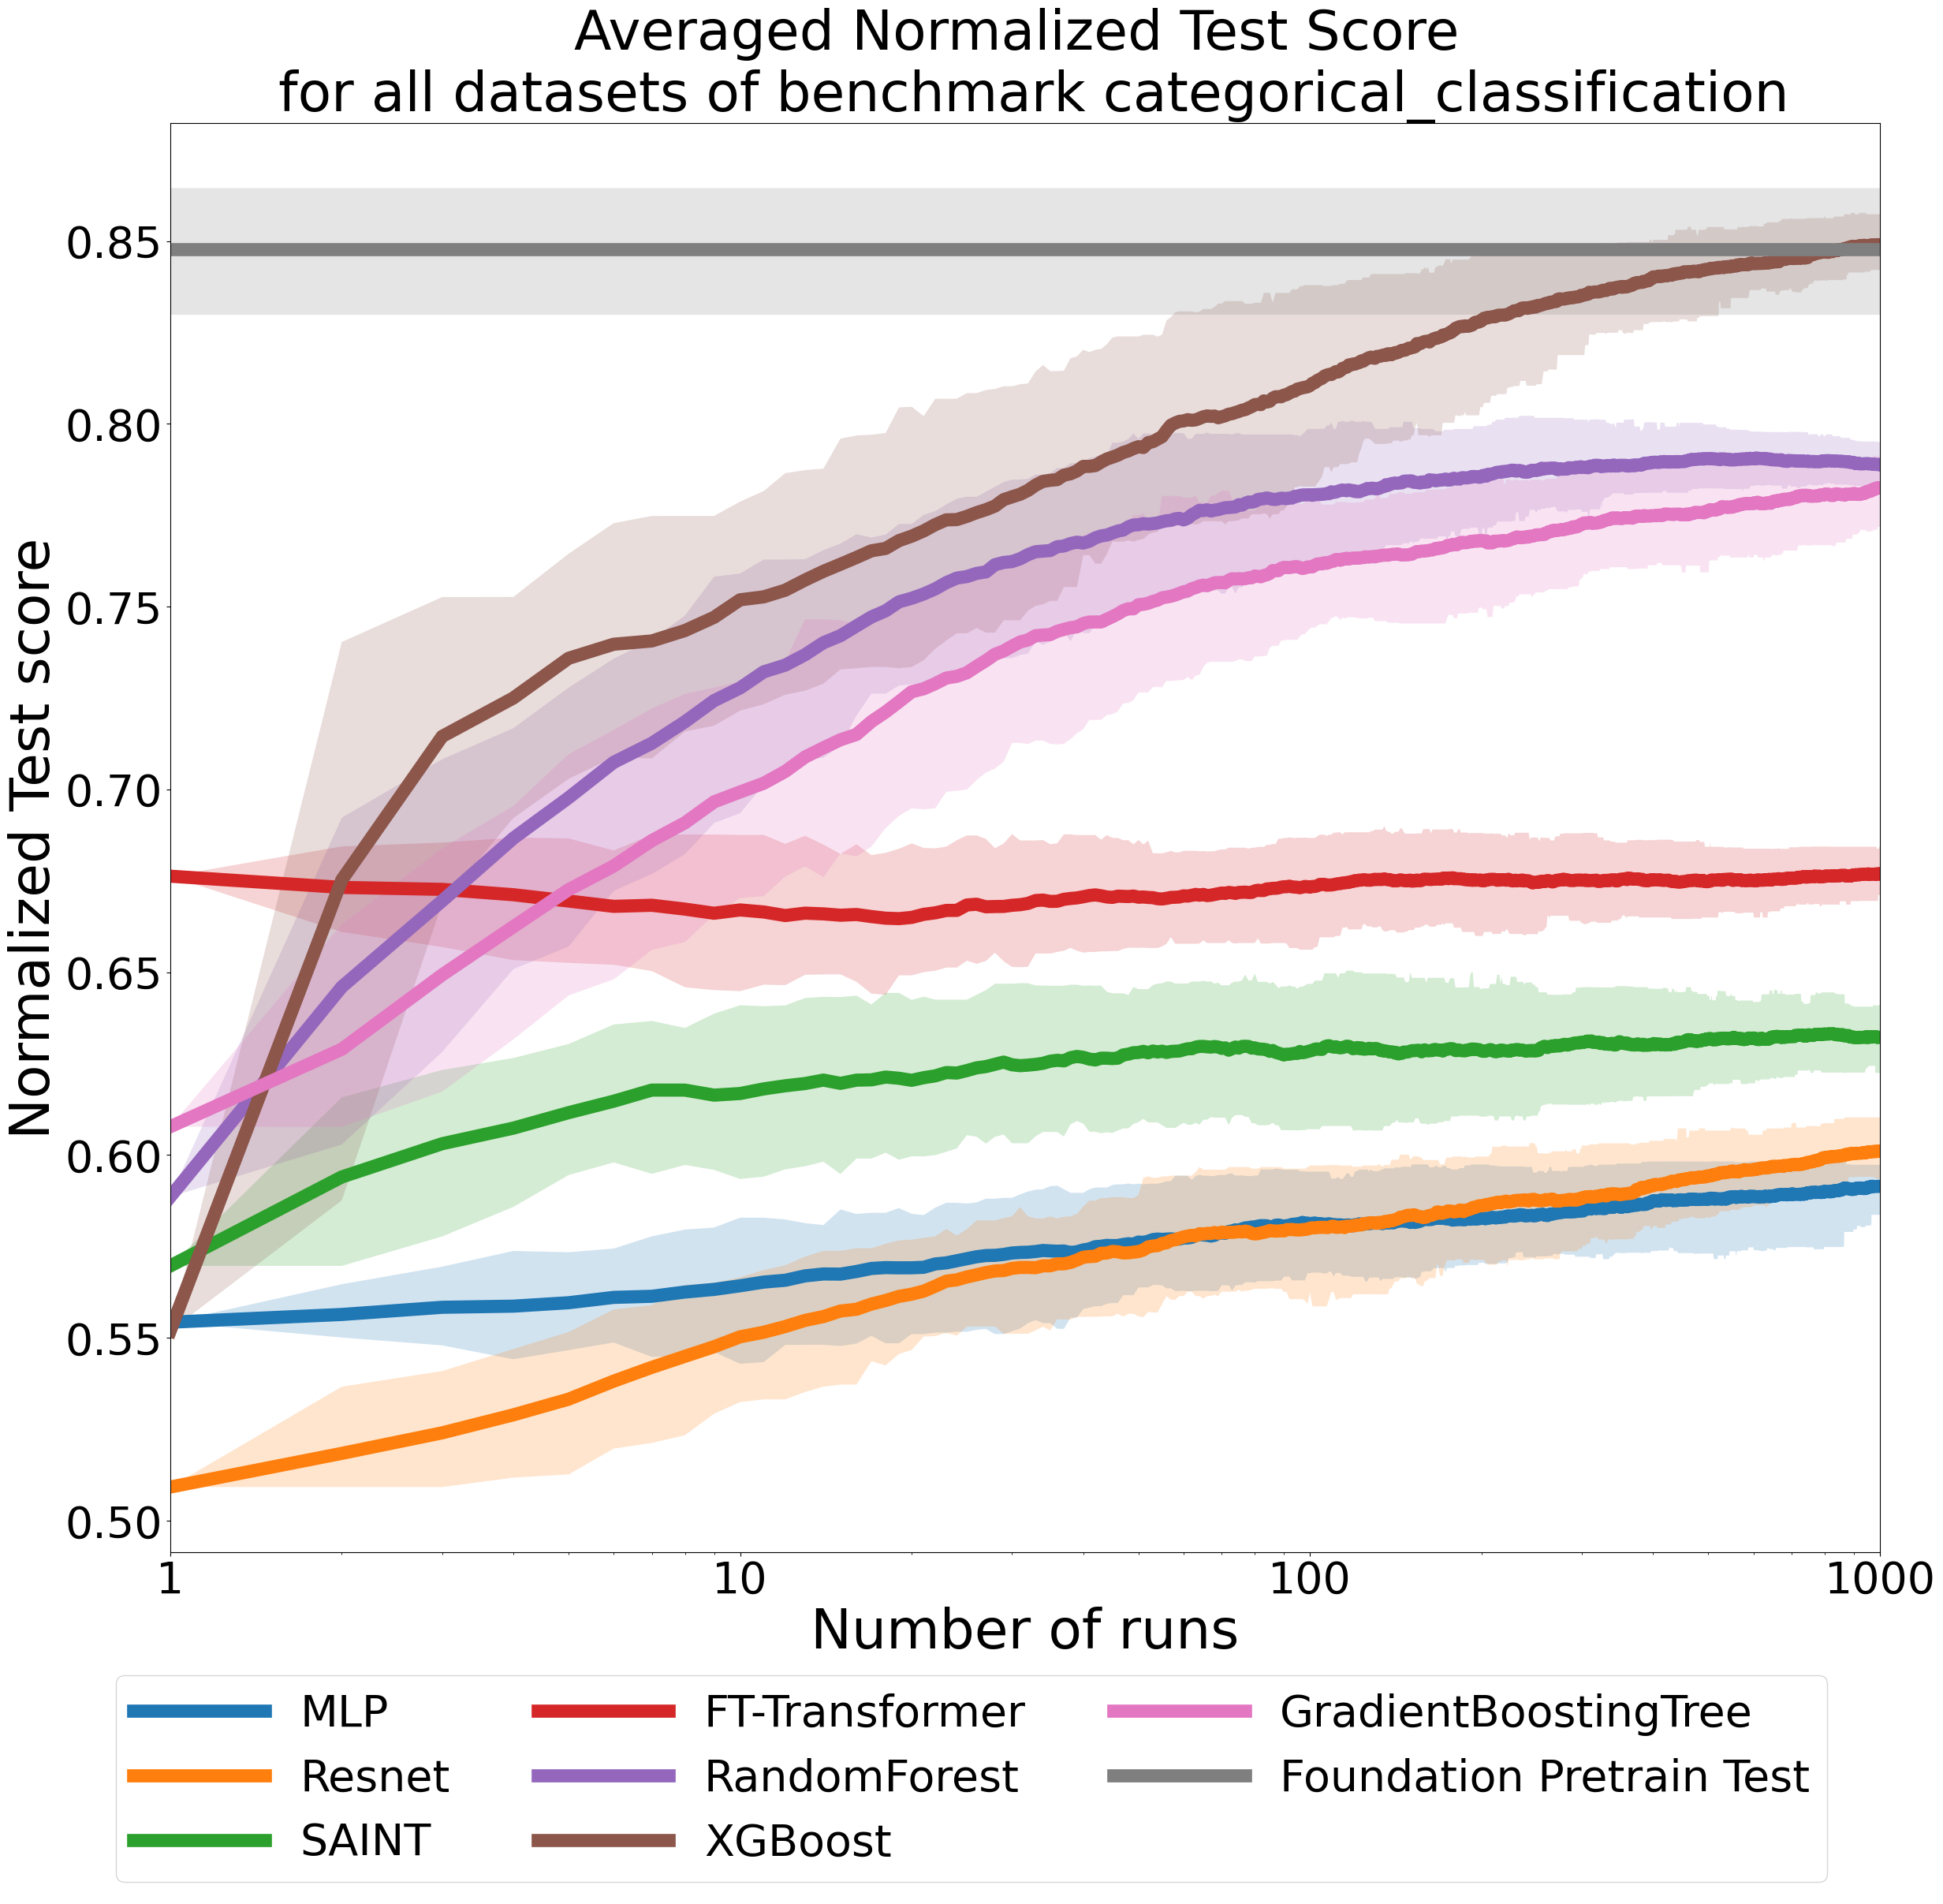

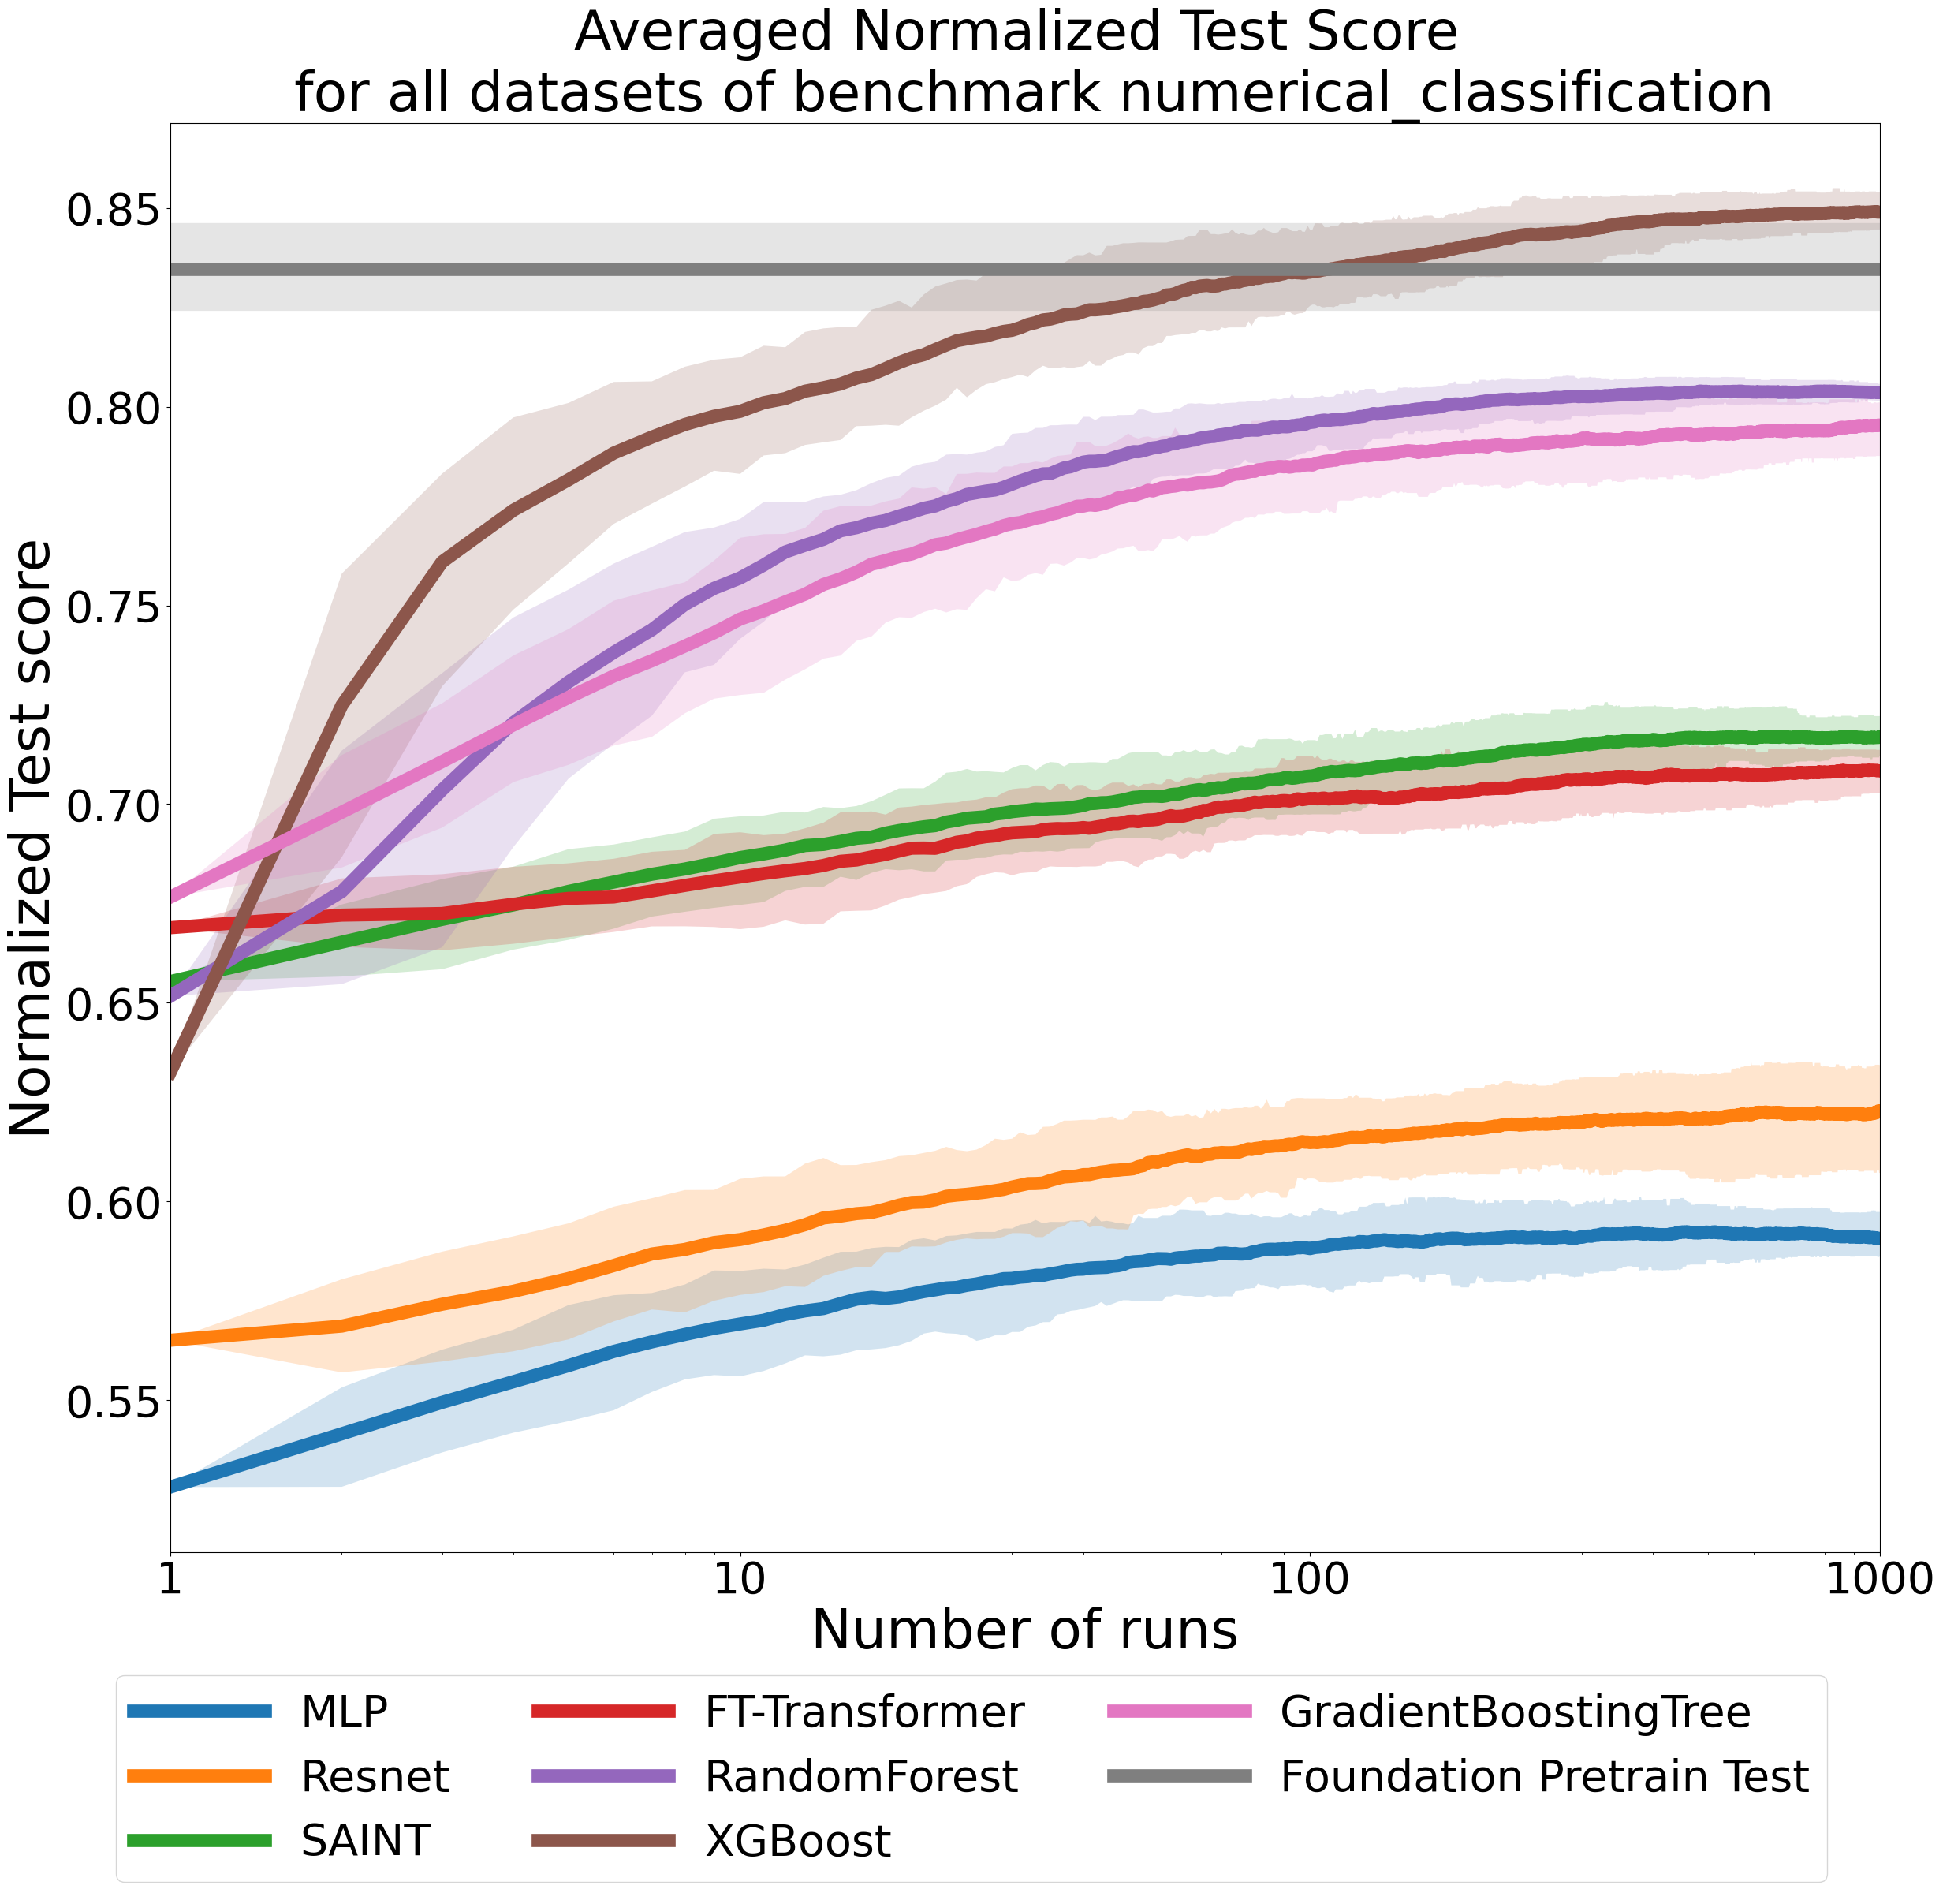

In [2]:
from tabularbench.results.dataset_plot_combined import make_combined_dataset_plot

cfg_categorical = ConfigBenchmarkSweep.load(Path("outputs_done/foundation_mix_600k_finetune/test_categorical_classification/config_benchmark_sweep.yaml"))
dataset_plot_combined_categorical = np.load('outputs_done/foundation_mix_600k_finetune/test_categorical_classification/dataset_plot_combined.npy')
fig_categorical = make_combined_dataset_plot(cfg_categorical, dataset_plot_combined_categorical)


cfg_numerical = ConfigBenchmarkSweep.load(Path("outputs_done/foundation_mix_600k_finetune/test_numerical_classification/config_benchmark_sweep.yaml"))
dataset_plot_combined_numerical = np.load('outputs_done/foundation_mix_600k_finetune/test_numerical_classification/dataset_plot_combined.npy')
fig_numerical = make_combined_dataset_plot(cfg_numerical, dataset_plot_combined_numerical)




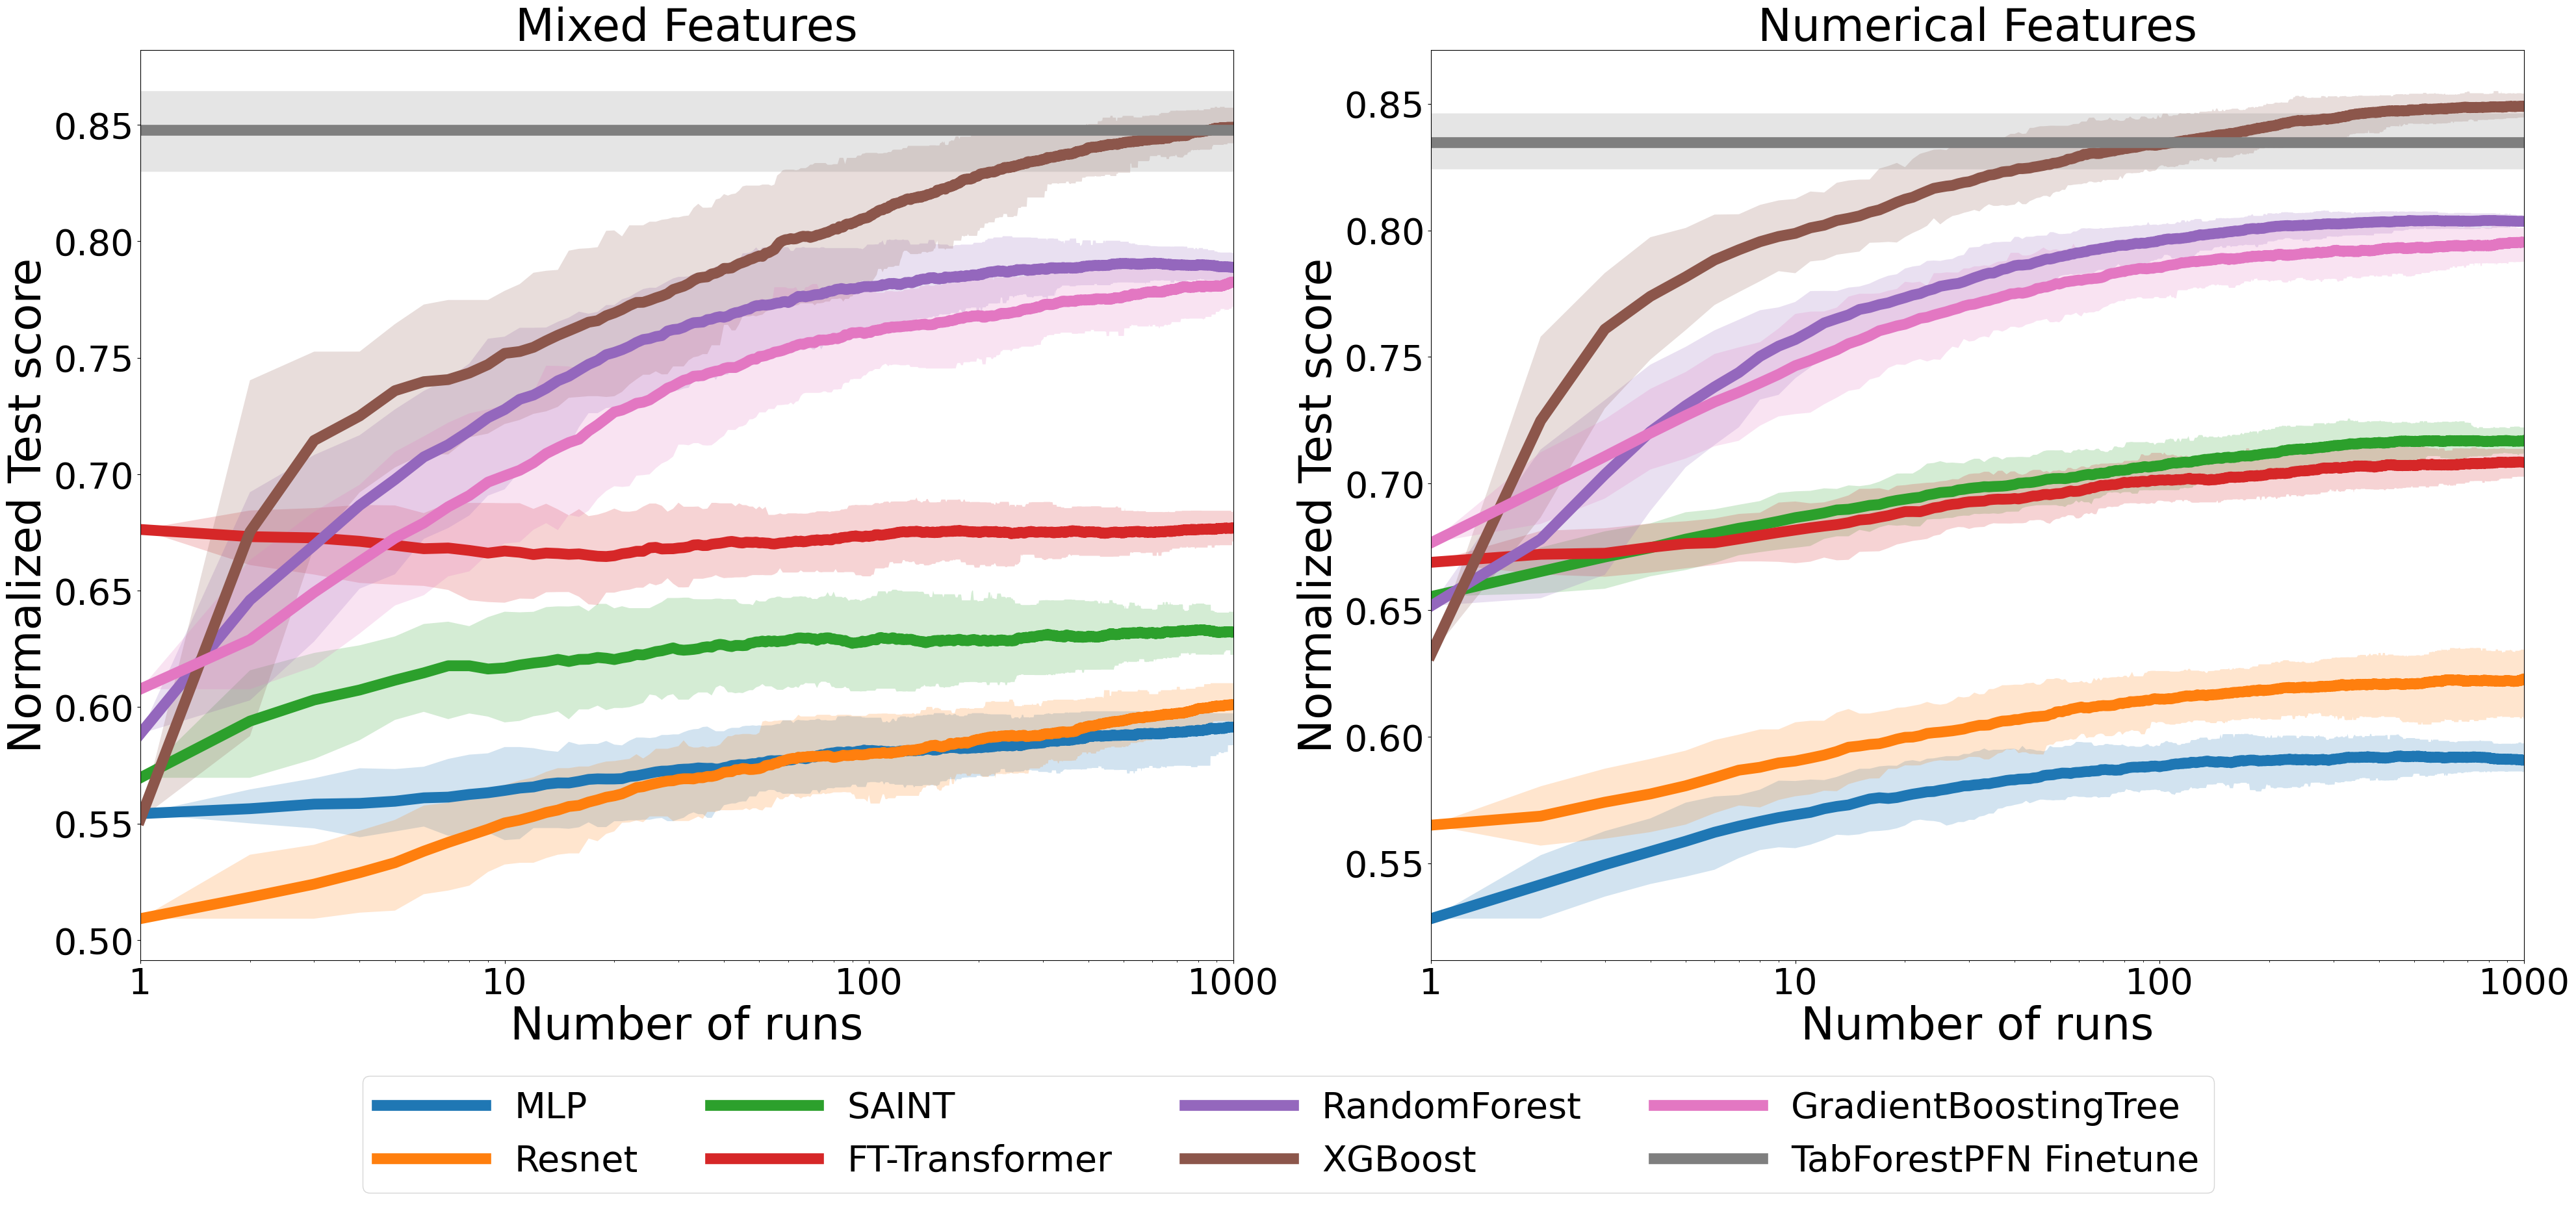

In [3]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(40, 20))

models = cfg_categorical.plotting.whytrees.benchmark_model_names + [cfg_categorical.model_plot_name]

for model_i, model in enumerate(models):

    sequence_mean = dataset_plot_combined_categorical[0, model_i, :]
    sequence_lower_bound = dataset_plot_combined_categorical[1, model_i, :]
    sequence_upper_bound = dataset_plot_combined_categorical[2, model_i, :]

    epochs = np.arange(len(sequence_mean)) + cfg_categorical.plotting.whytrees.plot_default_value

    axes[0].plot(epochs, sequence_mean, label=model, linewidth=12)
    axes[0].fill_between(x=epochs, y1=sequence_lower_bound, y2=sequence_upper_bound, alpha=0.2)


models = cfg_numerical.plotting.whytrees.benchmark_model_names + [cfg_numerical.model_plot_name]

for model_i, model in enumerate(models):

    sequence_mean = dataset_plot_combined_numerical[0, model_i, :]
    sequence_lower_bound = dataset_plot_combined_numerical[1, model_i, :]
    sequence_upper_bound = dataset_plot_combined_numerical[2, model_i, :]

    epochs = np.arange(len(sequence_mean)) + cfg_numerical.plotting.whytrees.plot_default_value

    axes[1].plot(epochs, sequence_mean, label=model, linewidth=12)
    axes[1].fill_between(x=epochs, y1=sequence_lower_bound, y2=sequence_upper_bound, alpha=0.2)


for ax in axes:
    ax.set_xlabel("Number of runs", fontsize=50)
    ax.set_ylabel("Normalized Test score", fontsize=50)
    ax.set_title("Mixed Features", fontsize=50)
    ax.set_xscale('log')
    ax.set_xlim([1, cfg_numerical.plotting.whytrees.n_runs])
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
    ax.tick_params(axis='both', which='major', labelsize=40)

axes[0].set_title(f"Mixed Features", fontsize=50)
axes[1].set_title(f"Numerical Features", fontsize=50)


handles, labels = axes[0].get_legend_handles_labels()
labels = labels[:-1] + ["TabForestPFN Finetune"]
# fig.suptitle(f"Averaged Normalized Test Score for the WhyTrees Benchmark", fontsize=80)
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=40, handlelength=3)
fig.tight_layout(pad=2.0, rect=[0, 0.12, 1, 0.95])

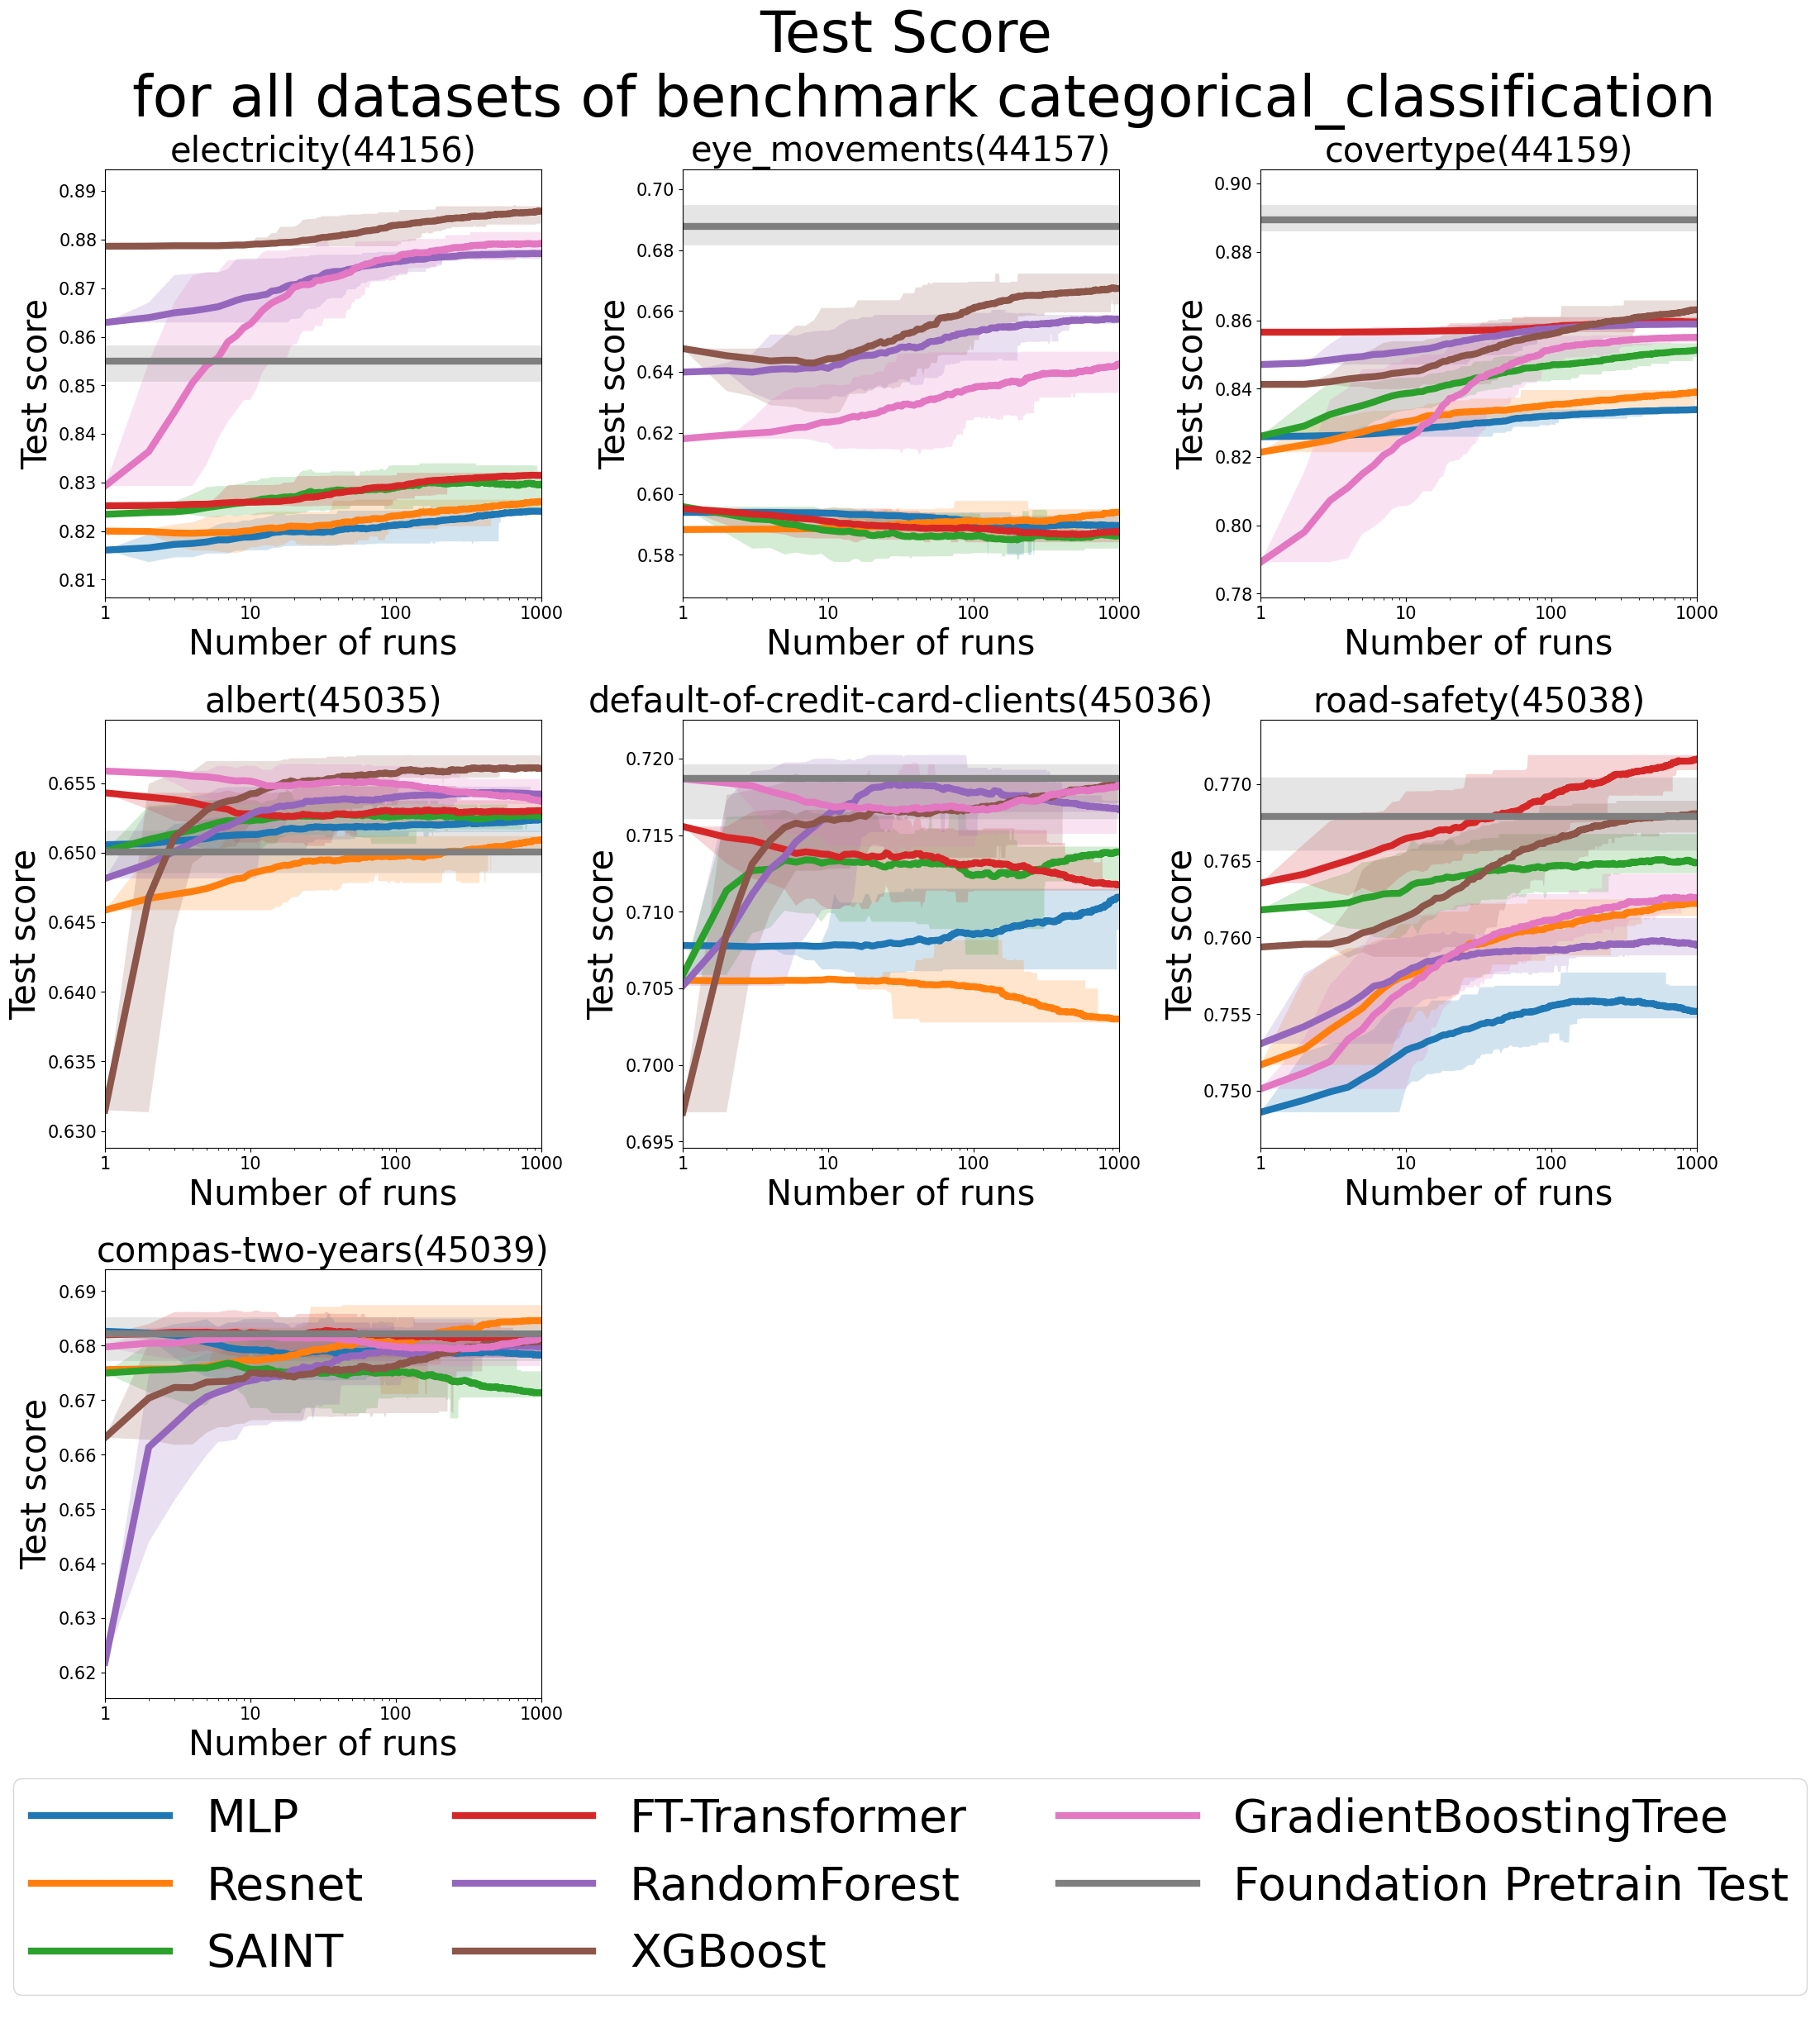

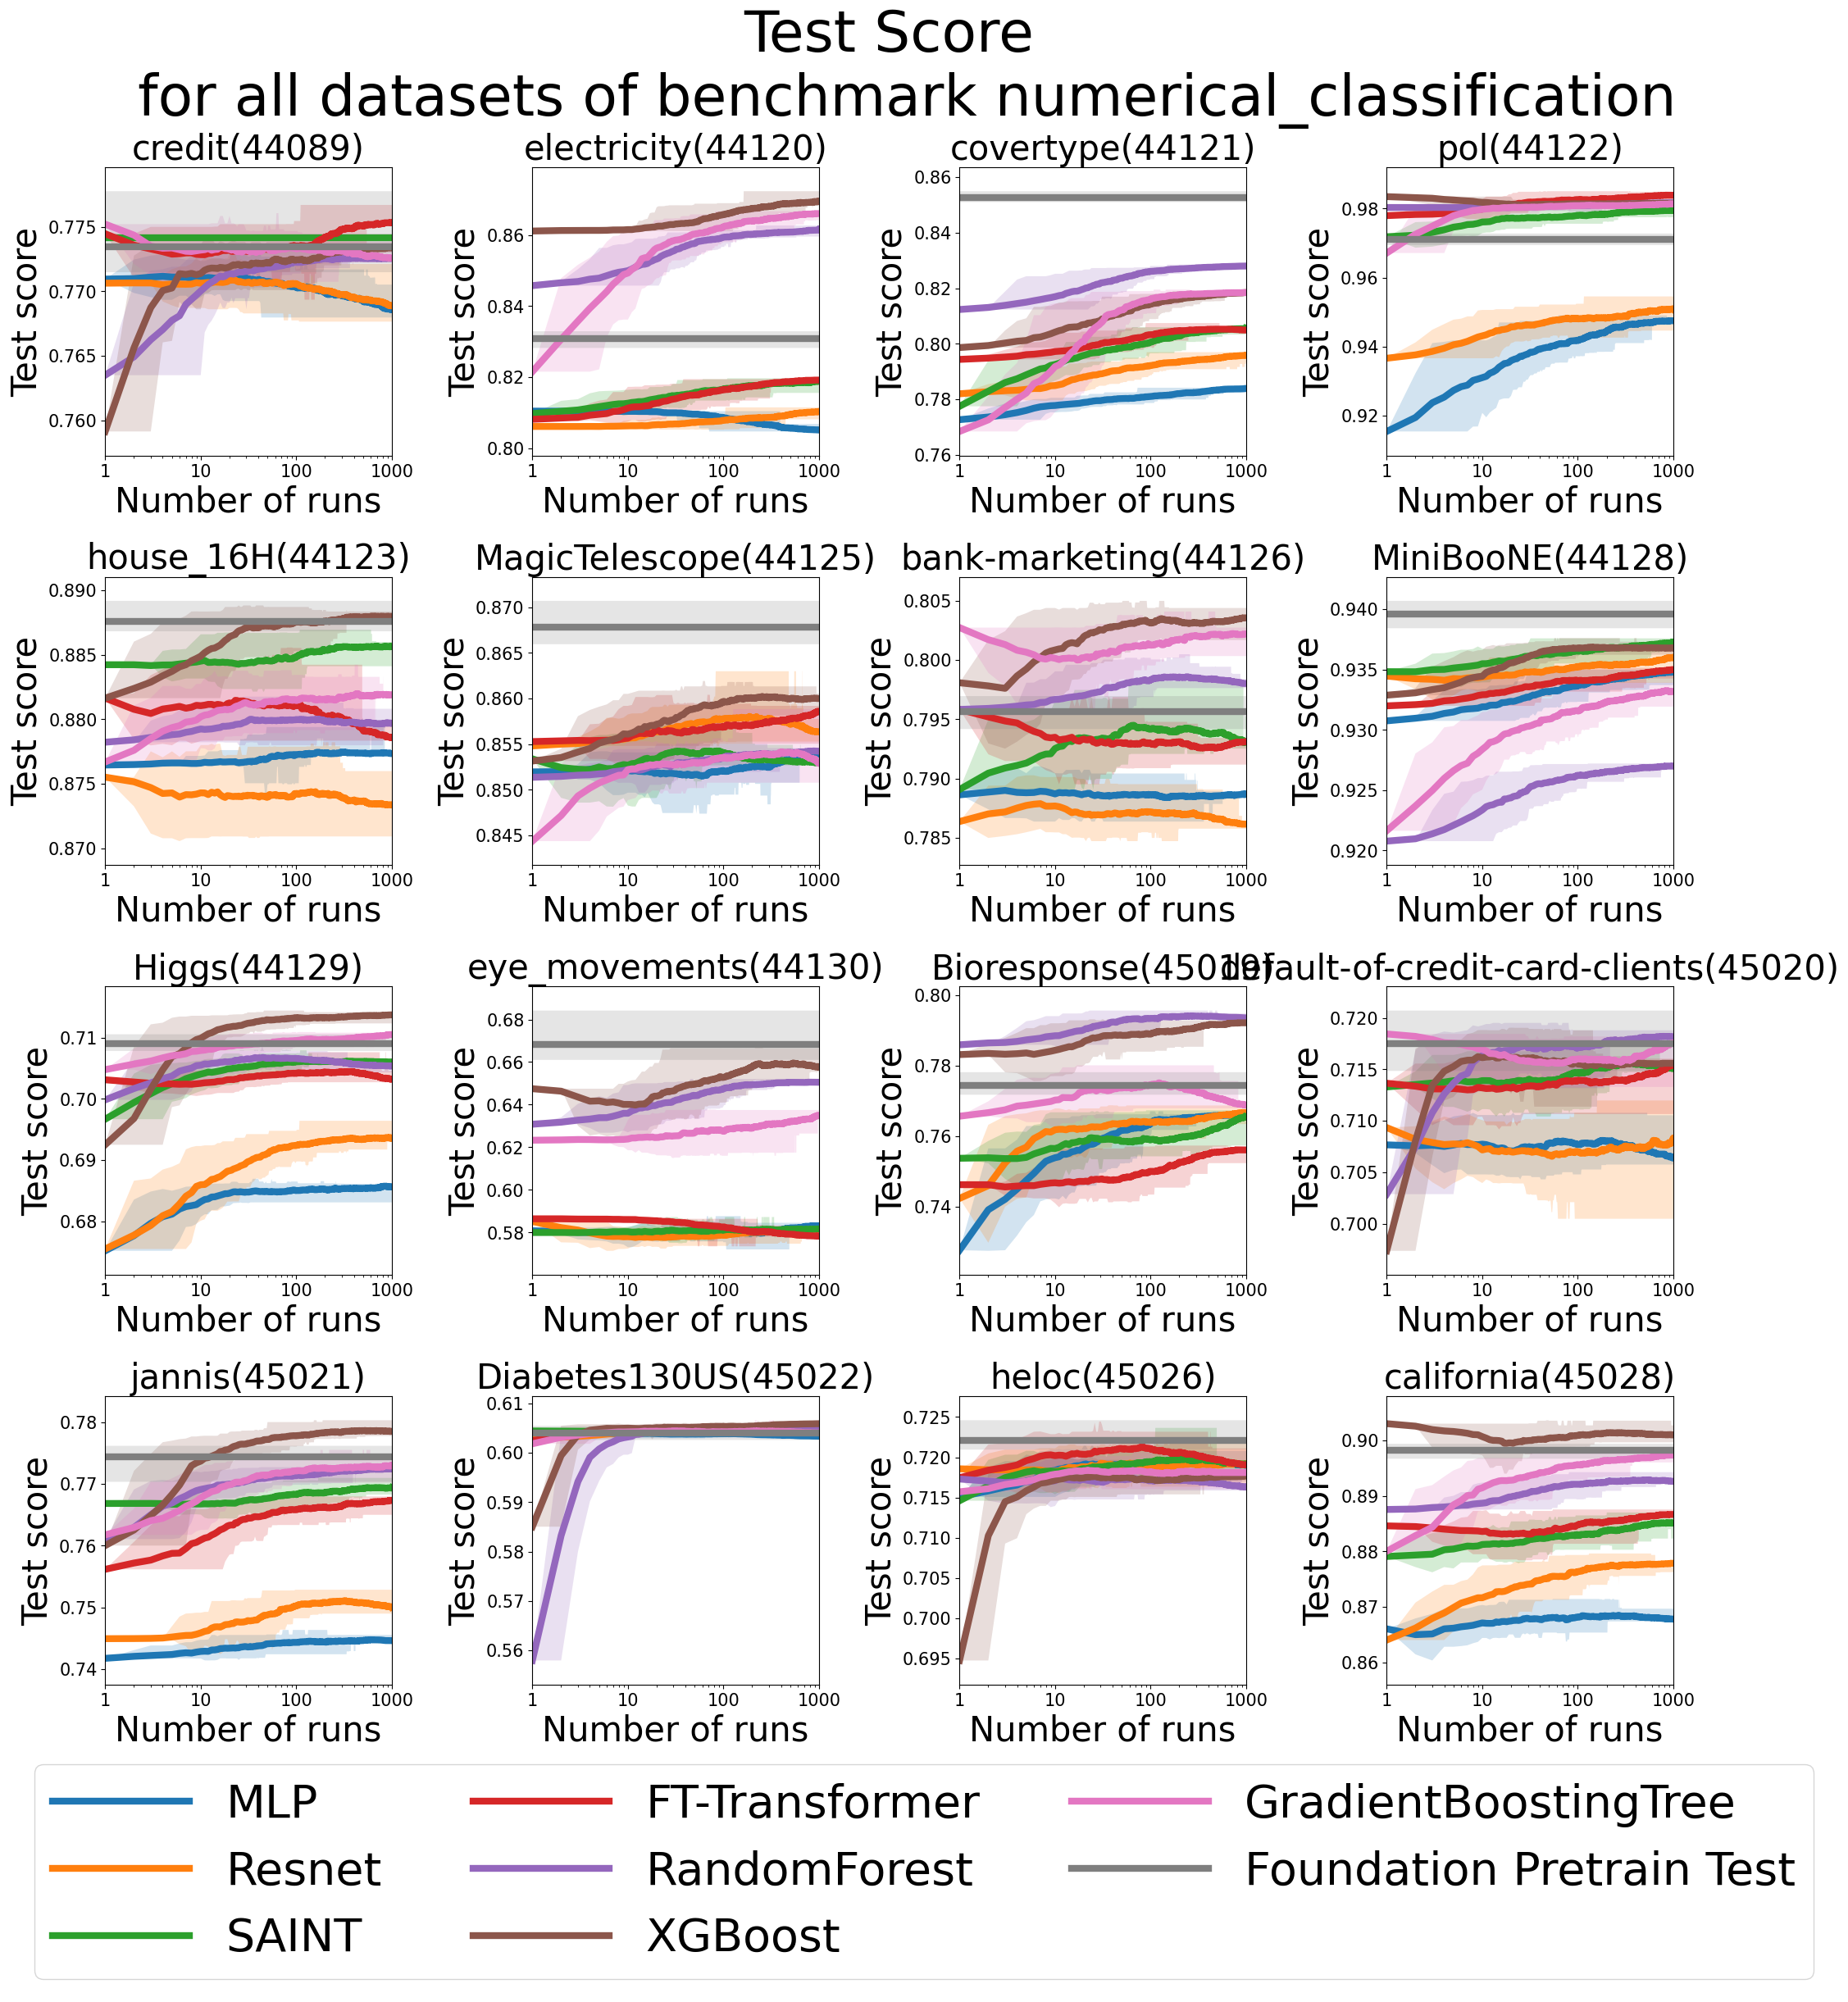

In [4]:
from tabularbench.results.dataset_plot_separate import make_separate_dataset_plots

cfg_categorical = ConfigBenchmarkSweep.load(Path("outputs_done/foundation_mix_600k_finetune/test_categorical_classification/config_benchmark_sweep.yaml"))
dataset_plot_separate_categorical = np.load('outputs_done/foundation_mix_600k_finetune/test_categorical_classification/dataset_plot_separate.npy')
fig_categorical = make_separate_dataset_plots(cfg_categorical, dataset_plot_separate_categorical)


cfg_numerical = ConfigBenchmarkSweep.load(Path("outputs_done/foundation_mix_600k_finetune/test_numerical_classification/config_benchmark_sweep.yaml"))
dataset_plot_separate_numerical = np.load('outputs_done/foundation_mix_600k_finetune/test_numerical_classification/dataset_plot_separate.npy')
fig_numerical = make_separate_dataset_plots(cfg_numerical, dataset_plot_separate_numerical)




Text(0.5, 0.98, 'Test Accuracy for all datasets of WhyTrees')

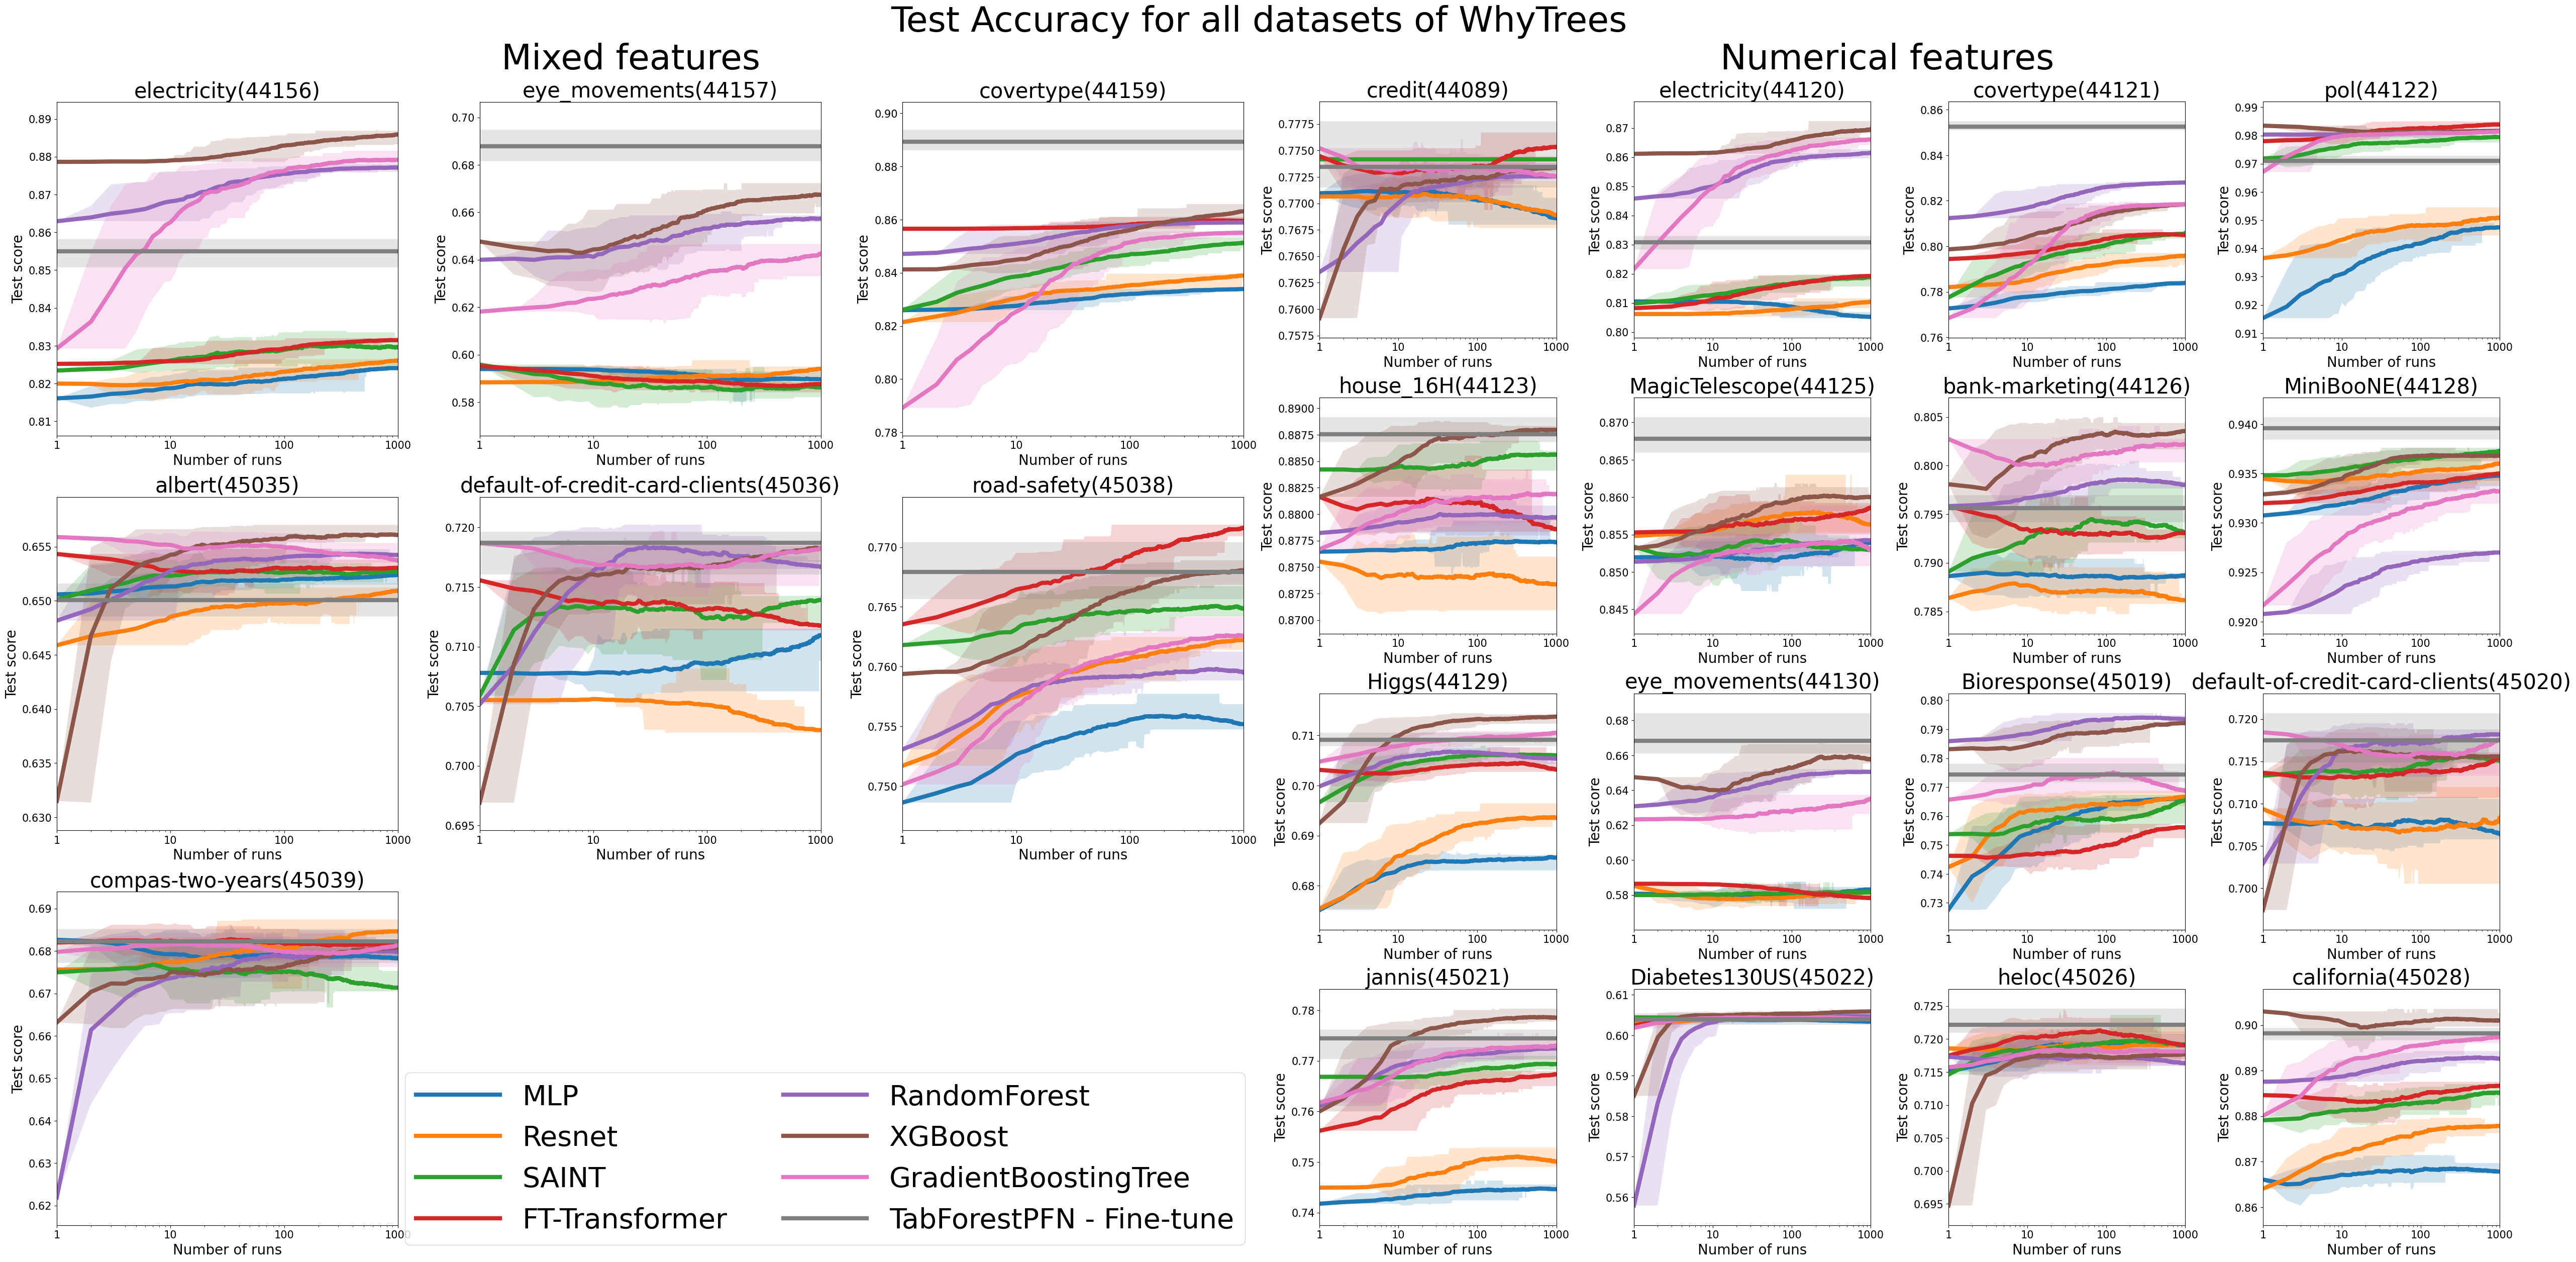

In [5]:
import math

models = cfg_categorical.plotting.whytrees.benchmark_model_names + ["TabForestPFN - Fine-tune"]
n_dataset_ids_categorical = len(cfg_categorical.openml_dataset_ids_to_use)
n_dataset_ids_numerical = len(cfg_numerical.openml_dataset_ids_to_use)

num_horizontal_subplots_categorical = math.ceil(math.sqrt(n_dataset_ids_categorical))
num_horizontal_subplots_numerical = math.ceil(math.sqrt(n_dataset_ids_numerical))

fig = plt.figure(figsize=(50, 25), constrained_layout=True)
subfigs = fig.subfigures(1, 2, wspace=-1.0)

for subfig, feature_type in zip(subfigs.flat, ["categorical", "numerical"]):

    match feature_type:
        case "categorical":
            plot_data = dataset_plot_separate_categorical
            n_dataset_ids = n_dataset_ids_categorical
            cfg = cfg_categorical
            num_horizontal_subplots = num_horizontal_subplots_categorical
            title = "Mixed features"
        case "numerical":
            plot_data = dataset_plot_separate_numerical
            n_dataset_ids = n_dataset_ids_numerical
            cfg = cfg_numerical
            num_horizontal_subplots = num_horizontal_subplots_numerical
            title = "Numerical features"

    axs = subfig.subplots(nrows=num_horizontal_subplots, ncols=num_horizontal_subplots)
    axs = axs.flatten()

    #remove the last few subplots that we don't need
    for i in range(n_dataset_ids, len(axs)):
        subfig.delaxes(axs[i])

    for dataset_i, (openml_dataset_id, ax) in enumerate(zip(cfg.openml_dataset_ids_to_use, axs)):
        for model_i, model in enumerate(models):

            sequence_mean = plot_data[0, model_i, dataset_i, :]
            sequence_lower_bound = plot_data[1, model_i, dataset_i, :]
            sequence_upper_bound = plot_data[2, model_i, dataset_i, :]

            epochs = np.arange(len(sequence_mean)) + cfg.plotting.whytrees.plot_default_value

            ax.plot(epochs, sequence_mean, label=model, linewidth=6)
            ax.fill_between(
                x=epochs, 
                y1=sequence_lower_bound, 
                y2=sequence_upper_bound, 
                alpha=0.2
            )

        dataset_name = cfg.benchmark.openml_dataset_names[cfg.benchmark.openml_dataset_ids.index(openml_dataset_id)]
        ax.set_title(dataset_name + f"({openml_dataset_id})", fontsize=30)
        ax.title.set_size(30)
        ax.set_xlabel("Number of runs")
        ax.xaxis.label.set_size(20)
        ax.set_ylabel("Test score")
        ax.yaxis.label.set_size(20)
        ax.tick_params(axis='both', which='major', labelsize=15)

        min_y = np.min(plot_data[1, :, dataset_i, :])
        max_y = np.max(plot_data[2, :, dataset_i, :])
        spread = max_y - min_y
        min_y = min_y - 0.1 * spread
        max_y = max_y + 0.1 * spread

        ax.set_ylim([min_y, max_y])
        ax.set_xscale('log')
        ax.set_xlim([1, cfg.plotting.whytrees.n_runs])
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

    subfig.suptitle(title, fontsize=50)
    handles, labels = ax.get_legend_handles_labels()

    if feature_type == "categorical":
        subfig.legend(handles, labels, loc='lower right', ncol=2, fontsize=40, handlelength=3)

fig.suptitle(f"Test Accuracy for all datasets of WhyTrees", fontsize=50)

In [6]:
dataset_plot_separate_categorical_tabforestpfn = np.load('outputs_done/foundation_mix_600k_finetune/test_categorical_classification/dataset_plot_separate.npy')
dataset_plot_separate_categorical_tabforest = np.load('outputs_done/whytrees_tabsgfd_finetune/foundation-default-categorical_classification/dataset_plot_separate.npy')
dataset_plot_separate_categorical_tabpfn = np.load('outputs_done/whytrees_tabpfn_foun_finetune/foundation-default-categorical_classification/dataset_plot_separate.npy')
dataset_plot_separate_numerical_tabforestpfn = np.load('outputs_done/foundation_mix_600k_finetune/test_numerical_classification/dataset_plot_separate.npy')
dataset_plot_separate_numerical_tabforest = np.load('outputs_done/whytrees_tabsgfd_finetune/foundation-default-numerical_classification/dataset_plot_separate.npy')
dataset_plot_separate_numerical_tabpfn = np.load('outputs_done/whytrees_tabpfn_foun_finetune/foundation-default-numerical_classification/dataset_plot_separate.npy')

dataset_plot_separate_categorical = np.concatenate([
    dataset_plot_separate_categorical_tabforestpfn, 
    dataset_plot_separate_categorical_tabforest[:, -1:, :, :], 
    dataset_plot_separate_categorical_tabpfn[:, -1:, :, :]
], axis=1)

dataset_plot_separate_numerical = np.concatenate([
    dataset_plot_separate_numerical_tabforestpfn, 
    dataset_plot_separate_numerical_tabforest[:, -1:, :, :], 
    dataset_plot_separate_numerical_tabpfn[:, -1:, :, :]
], axis=1)

Text(0.5, 0.98, 'Test Accuracy for all datasets of WhyTrees')

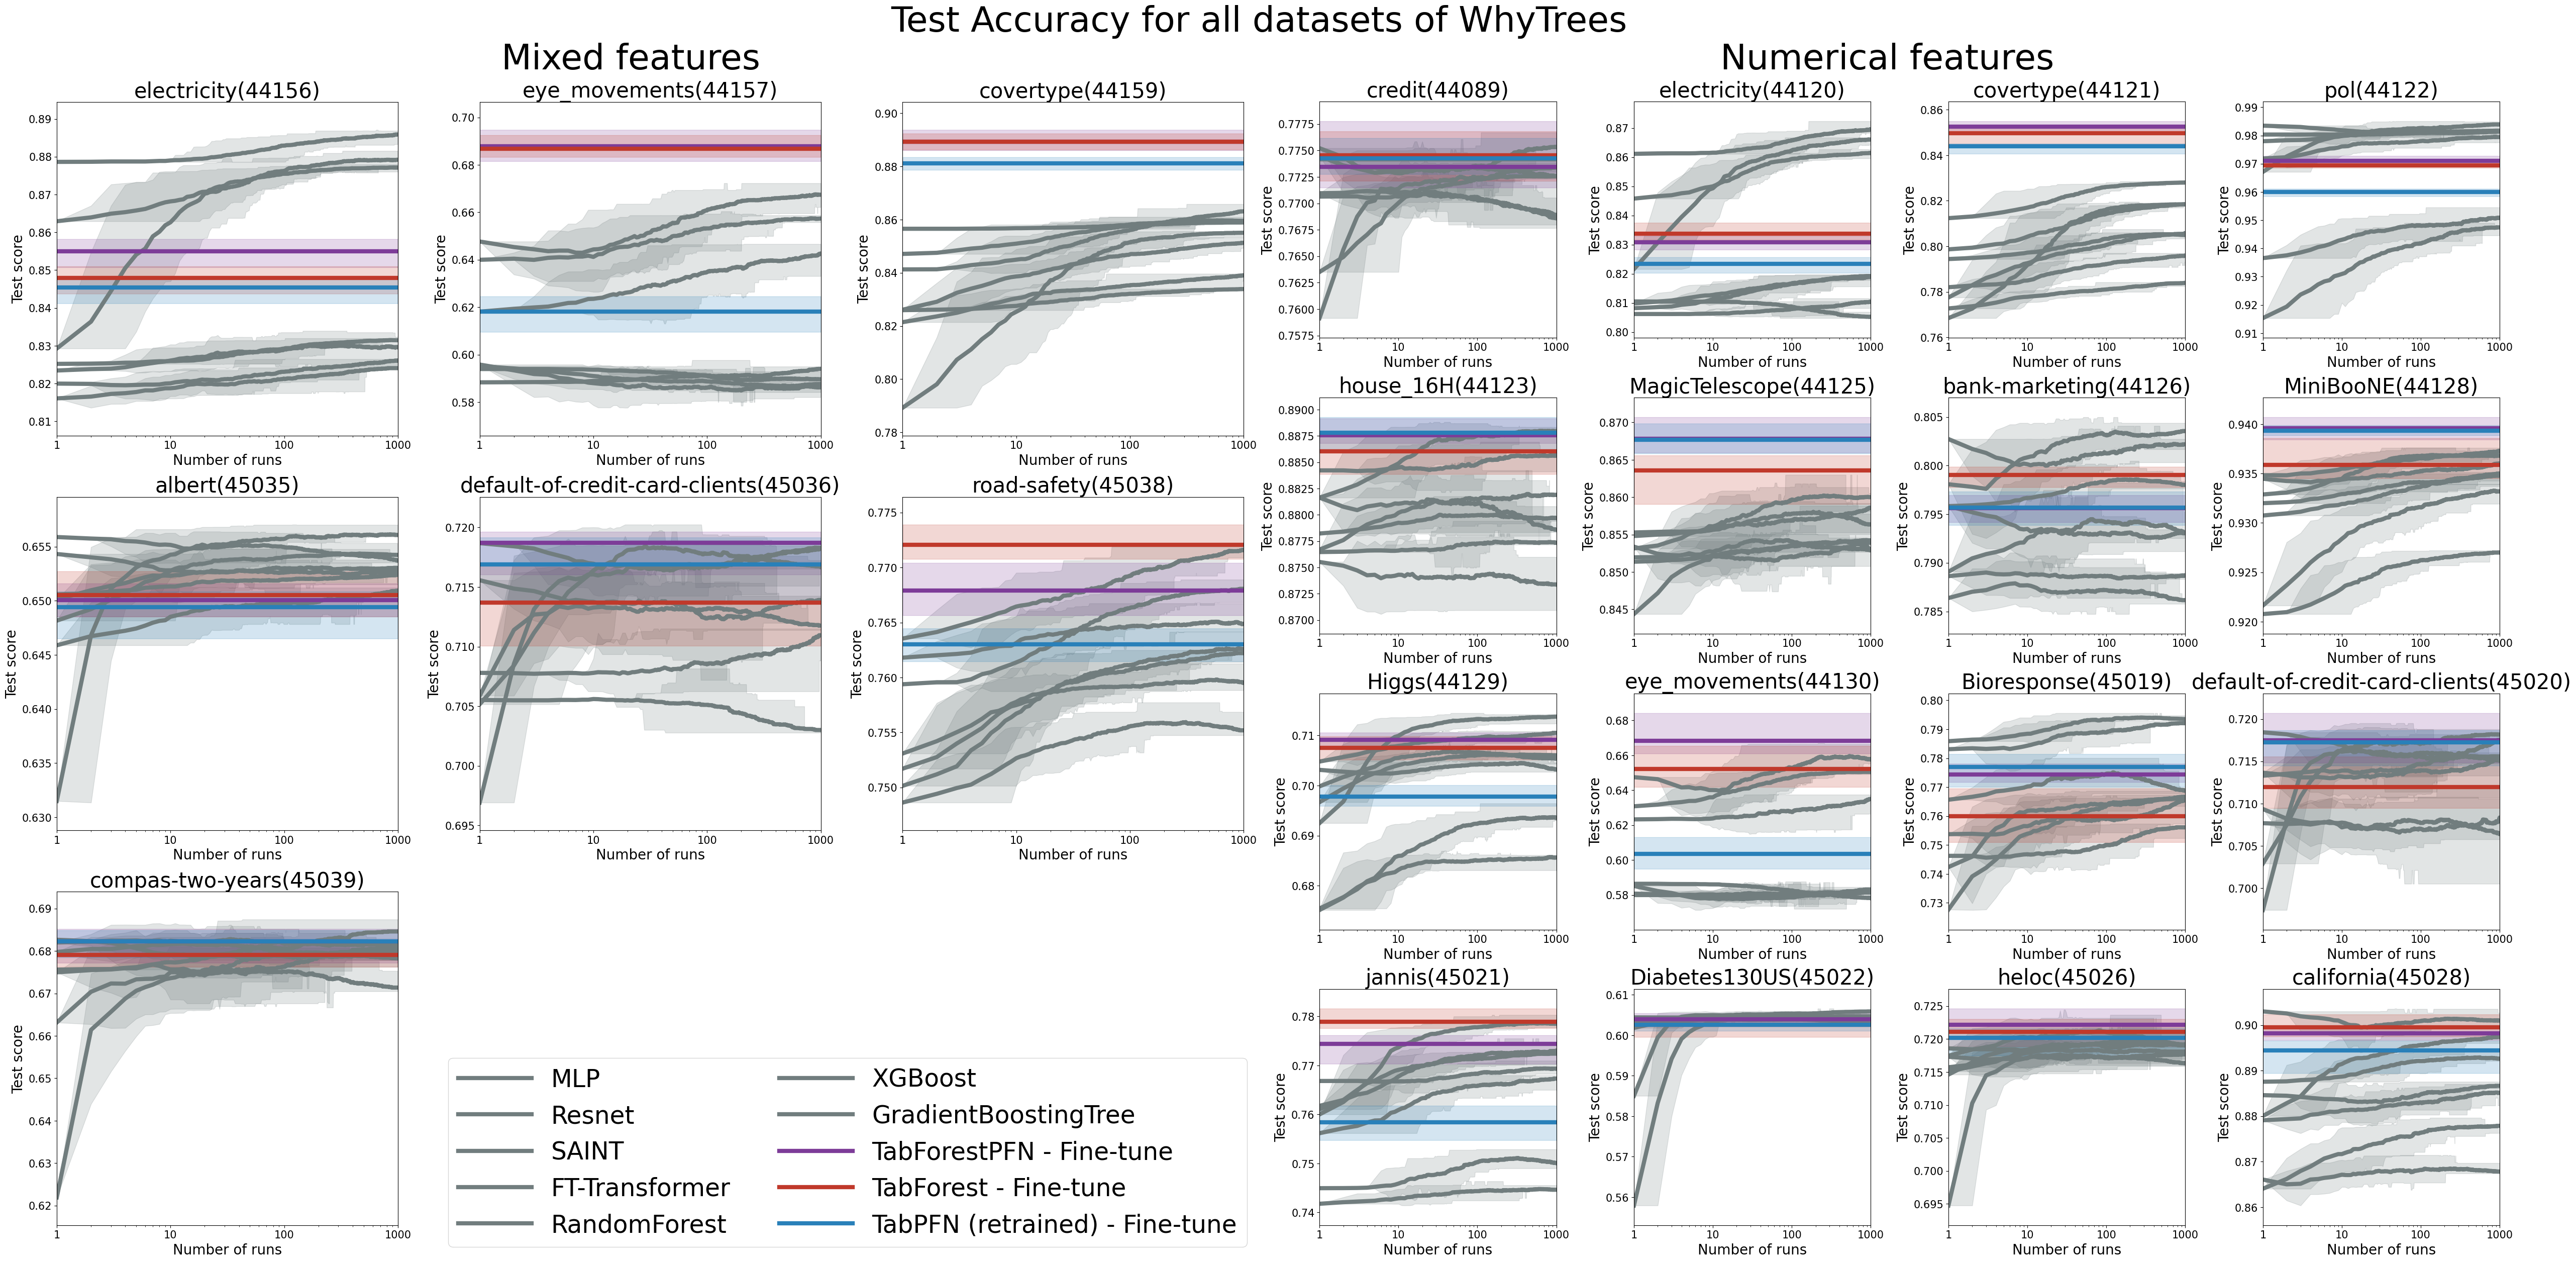

In [7]:
import math

models = cfg_categorical.plotting.whytrees.benchmark_model_names + ["TabForestPFN - Fine-tune", "TabForest - Fine-tune", "TabPFN (retrained) - Fine-tune"]
model_colors = ["#717d7e"] * 7 + ["#7d3c98", "#c0392b", "#2980b9"]

n_dataset_ids_categorical = len(cfg_categorical.openml_dataset_ids_to_use)
n_dataset_ids_numerical = len(cfg_numerical.openml_dataset_ids_to_use)

num_horizontal_subplots_categorical = math.ceil(math.sqrt(n_dataset_ids_categorical))
num_horizontal_subplots_numerical = math.ceil(math.sqrt(n_dataset_ids_numerical))

fig = plt.figure(figsize=(50, 25), constrained_layout=True)
subfigs = fig.subfigures(1, 2, wspace=-1.0)

for subfig, feature_type in zip(subfigs.flat, ["categorical", "numerical"]):

    match feature_type:
        case "categorical":
            plot_data = dataset_plot_separate_categorical
            n_dataset_ids = n_dataset_ids_categorical
            cfg = cfg_categorical
            num_horizontal_subplots = num_horizontal_subplots_categorical
            title = "Mixed features"
        case "numerical":
            plot_data = dataset_plot_separate_numerical
            n_dataset_ids = n_dataset_ids_numerical
            cfg = cfg_numerical
            num_horizontal_subplots = num_horizontal_subplots_numerical
            title = "Numerical features"

    axs = subfig.subplots(nrows=num_horizontal_subplots, ncols=num_horizontal_subplots)
    axs = axs.flatten()

    #remove the last few subplots that we don't need
    for i in range(n_dataset_ids, len(axs)):
        subfig.delaxes(axs[i])

    for dataset_i, (openml_dataset_id, ax) in enumerate(zip(cfg.openml_dataset_ids_to_use, axs)):
        for model_i, model in enumerate(models):

            sequence_mean = plot_data[0, model_i, dataset_i, :]
            sequence_lower_bound = plot_data[1, model_i, dataset_i, :]
            sequence_upper_bound = plot_data[2, model_i, dataset_i, :]

            epochs = np.arange(len(sequence_mean)) + cfg.plotting.whytrees.plot_default_value

            ax.plot(epochs, sequence_mean, label=model, linewidth=6, color=model_colors[model_i])
            ax.fill_between(
                x=epochs, 
                y1=sequence_lower_bound, 
                y2=sequence_upper_bound, 
                alpha=0.2,
                color=model_colors[model_i]
            )

        dataset_name = cfg.benchmark.openml_dataset_names[cfg.benchmark.openml_dataset_ids.index(openml_dataset_id)]
        ax.set_title(dataset_name + f"({openml_dataset_id})", fontsize=30)
        ax.title.set_size(30)
        ax.set_xlabel("Number of runs")
        ax.xaxis.label.set_size(20)
        ax.set_ylabel("Test score")
        ax.yaxis.label.set_size(20)
        ax.tick_params(axis='both', which='major', labelsize=15)

        min_y = np.min(plot_data[1, :, dataset_i, :])
        max_y = np.max(plot_data[2, :, dataset_i, :])
        spread = max_y - min_y
        min_y = min_y - 0.1 * spread
        max_y = max_y + 0.1 * spread

        ax.set_ylim([min_y, max_y])
        ax.set_xscale('log')
        ax.set_xlim([1, cfg.plotting.whytrees.n_runs])
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

    subfig.suptitle(title, fontsize=50)
    handles, labels = ax.get_legend_handles_labels()

    if feature_type == "categorical":
        subfig.legend(handles, labels, loc='lower right', ncol=2, fontsize=35, handlelength=3)

fig.suptitle(f"Test Accuracy for all datasets of WhyTrees", fontsize=50)

Text(0.5, 0.98, 'Test Accuracy for some datasets of WhyTrees')

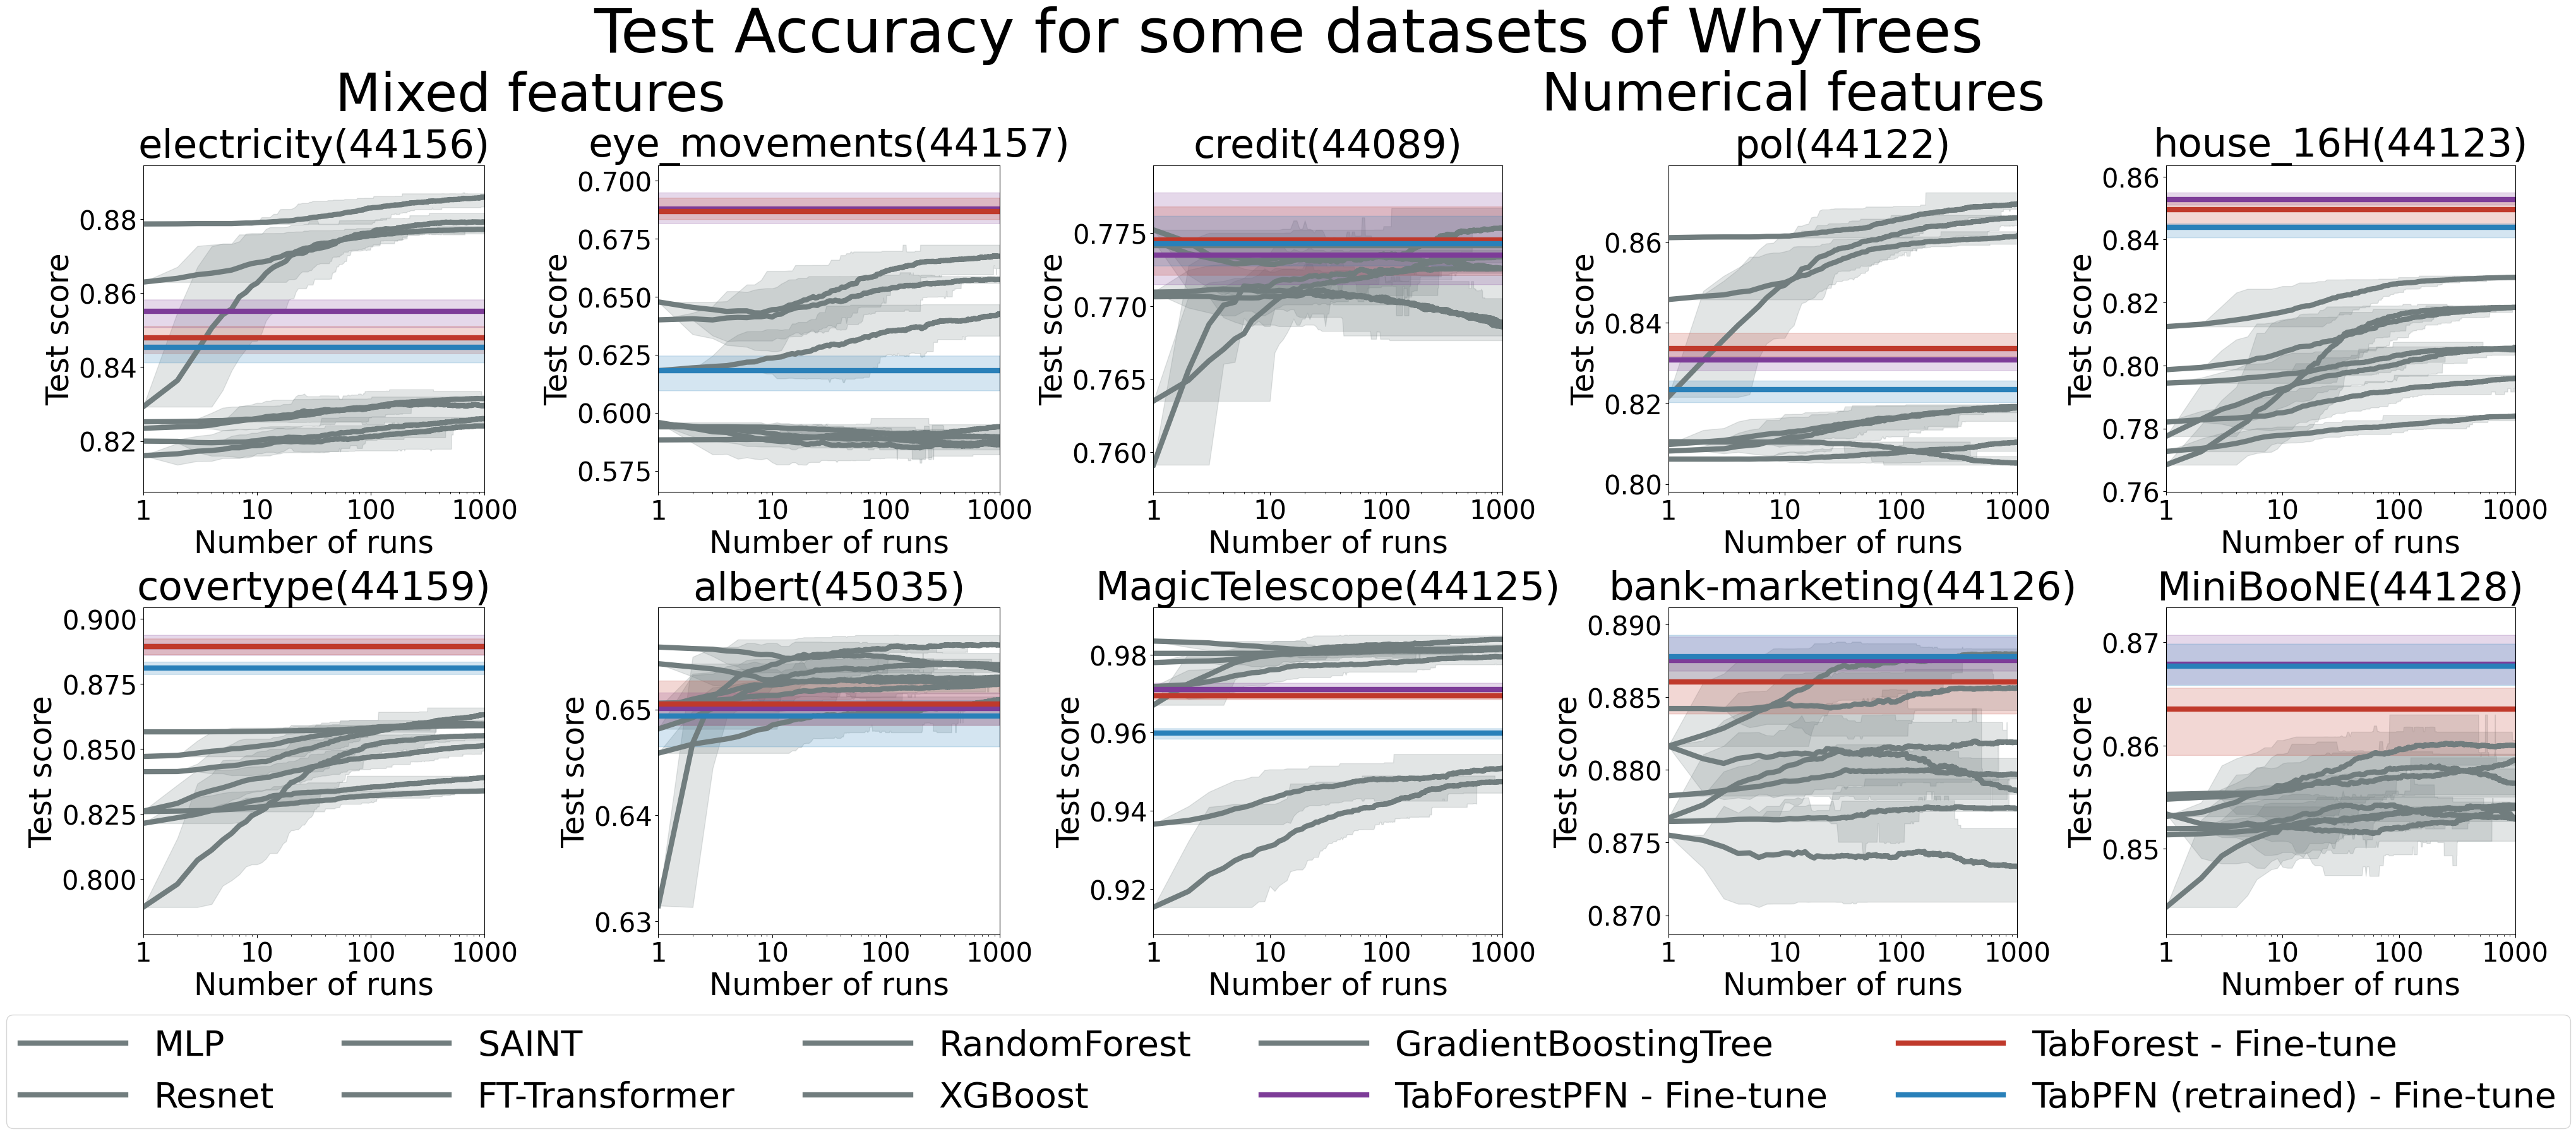

In [13]:
import math

models = cfg_categorical.plotting.whytrees.benchmark_model_names + ["TabForestPFN - Fine-tune", "TabForest - Fine-tune", "TabPFN (retrained) - Fine-tune"]
model_colors = ["#717d7e"] * 7 + ["#7d3c98", "#c0392b", "#2980b9"]

n_dataset_ids_categorical = len(cfg_categorical.openml_dataset_ids_to_use)
n_dataset_ids_numerical = len(cfg_numerical.openml_dataset_ids_to_use)

num_horizontal_subplots_categorical = math.ceil(math.sqrt(n_dataset_ids_categorical))
num_horizontal_subplots_numerical = math.ceil(math.sqrt(n_dataset_ids_numerical))

fig = plt.figure(figsize=(40, 18), constrained_layout=True)
sfigs = fig.subfigures(2, 1, wspace=-1.0, height_ratios=[9, 1.2])
subfigs = sfigs[0].subfigures(1, 2, wspace=-1.0, width_ratios=[2, 3])

for subfig, feature_type in zip(subfigs.flat, ["categorical", "numerical"]):

    match feature_type:
        case "categorical":
            plot_data = dataset_plot_separate_categorical
            n_dataset_ids = n_dataset_ids_categorical
            cfg = cfg_categorical
            axs = subfig.subplots(nrows=2, ncols=2)
            dataset_ids = [44156, 44157, 44159, 45035]
            title = "Mixed features"
        case "numerical":
            plot_data = dataset_plot_separate_numerical
            n_dataset_ids = n_dataset_ids_numerical
            cfg = cfg_numerical
            axs = subfig.subplots(nrows=2, ncols=3)
            dataset_ids = [44089, 44122, 44123, 44125, 44126, 44128]
            title = "Numerical features"

    axs = axs.flatten()

    #remove the last few subplots that we don't need
    for i in range(n_dataset_ids, len(axs)):
        subfig.delaxes(axs[i])

    for dataset_i, (openml_dataset_id, ax) in enumerate(zip(dataset_ids, axs)):
        for model_i, model in enumerate(models):

            sequence_mean = plot_data[0, model_i, dataset_i, :]
            sequence_lower_bound = plot_data[1, model_i, dataset_i, :]
            sequence_upper_bound = plot_data[2, model_i, dataset_i, :]

            epochs = np.arange(len(sequence_mean)) + cfg.plotting.whytrees.plot_default_value

            ax.plot(epochs, sequence_mean, label=model, linewidth=6, color=model_colors[model_i])
            ax.fill_between(
                x=epochs, 
                y1=sequence_lower_bound, 
                y2=sequence_upper_bound, 
                alpha=0.2,
                color=model_colors[model_i]
            )

        dataset_name = cfg.benchmark.openml_dataset_names[cfg.benchmark.openml_dataset_ids.index(openml_dataset_id)]
        ax.set_title(dataset_name + f"({openml_dataset_id})", fontsize=30)
        ax.title.set_size(45)
        ax.set_xlabel("Number of runs")
        ax.xaxis.label.set_size(35)
        ax.set_ylabel("Test score")
        ax.yaxis.label.set_size(35)
        ax.tick_params(axis='both', which='major', labelsize=30)

        min_y = np.min(plot_data[1, :, dataset_i, :])
        max_y = np.max(plot_data[2, :, dataset_i, :])
        spread = max_y - min_y
        min_y = min_y - 0.1 * spread
        max_y = max_y + 0.1 * spread

        ax.set_ylim([min_y, max_y])
        ax.set_xscale('log')
        ax.set_xlim([1, cfg.plotting.whytrees.n_runs])
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

    subfig.suptitle(title, fontsize=60)
    handles, labels = ax.get_legend_handles_labels()


fig.legend(handles, labels, loc='lower center', ncol=5, fontsize=40, handlelength=3)
fig.suptitle(f"Test Accuracy for some datasets of WhyTrees", fontsize=70)

In [14]:
fig.savefig("whytrees_indiv_comparison_10.pdf")